In [1]:
import pandas as pd
import numpy as np

In [2]:
RAW_DATA = 'data/evras.csv'
POST_PROCESSING_DATA = 'data/post_evras.csv'
SOURCE_DATA = 'source/'
pd.options.display.max_columns = 90
target_columns = ['химшлак последний Al2O3',
                  'химшлак последний CaO',
                  'химшлак последний R',
                  'химшлак последний SiO2']

In [3]:
data = pd.read_csv(RAW_DATA, sep=';', index_col='index')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7040
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nplv                            7041 non-null   object
 1   DT                              7041 non-null   object
 2   МАРКА                           7041 non-null   object
 3   ПРОФИЛЬ                         7041 non-null   object
 4   t вып-обр                       6444 non-null   object
 5   t обработка                     6440 non-null   object
 6   t под током                     6440 non-null   object
 7   t продувка                      6444 non-null   object
 8   ПСН гр.                         5249 non-null   object
 9   чист расход C                   6435 non-null   object
 10  чист расход Cr                  5883 non-null   object
 11  чист расход Mn                  6431 non-null   object
 12  чист расход Si                  6431 non-null   

In [4]:
data.describe()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
count,7041,7041,7041,7041,6444,6440,6440,6444,5249,6435,5883,6431,6431,6178,6436,6436,6426,1389,6440,6444,6444,6444,6444,6426,1389,724,4770,13,6422,7,6307,5910,6244,33,5,383,6179,6400,82,6398,1017,5883,6440,6444,6444,6444,6444,6444,6443,6443,6444,6444,6444,6444,6444,6444,6444,6444,6218,6444,6444,6444,6444,6442,6444,6444,6444,6444,6444,6444,4742,6444,6444,6443,6444,6444,4742,4742,6444,6444,6443,6444,6444,4742
unique,7041,7041,18,18,82,816,1155,831,4296,6243,3115,6320,6265,4645,154,109,6423,1389,6362,226,3,1,1,5556,1341,593,469,1,307,7,691,197,7,28,2,83,692,399,80,528,199,398,3132,6,417,371,101,404,24,18,115,18,34,384,7,28,20,226,32,206,100,261,24,17,112,19,27,256,5,54,73,298,54,236,152,32,149,70,229,16,192,61,16,116
top,г6838638=;>,2070-09-11 21:39:00,Э76ХФ,Р65,"6,0","43,0333333","19,6833333","43,0333333","2,0","0,403735","0,104904","0,132318","0,123252","0,0412682","1571,0","1579,0","9,9717791","17,332563","13200,0","115,4","1,0","1,0","1,0","13,757","9,016","0,013442","0,063","0,02","0,05","0,42100000000000004","0,384","0,041","0,02","0,021014","0,05","0,024306","0,050094","0,128","0,046115","0,219","0,025897","0,214","4199,0","0,002","0,435","0,308","0,1","0,672","0,006","0,01","0,071","0,008","0,019","0,449","0,002","0,002","0,003","0,762","0,0002","0,418","0,103","0,789","0,006","0,012","0,071","0,009","0,015","0,566","0,003","0,037","3,7","57,0","0,4","11,3","0,11","2,2","21,7","4,4","57,6","0,5","8,7","0,08","2,2","26,0"
freq,1,1,4953,6427,227,53,32,56,526,3,17,3,2,9,134,282,2,1,4,124,6391,6444,6444,5,3,4,87,13,5873,1,34,250,6137,3,4,14,81,61,2,45,23,60,11,4656,62,91,236,73,1783,1751,308,1410,904,105,3727,2929,4526,166,1816,660,240,353,1590,1305,324,1363,1076,229,4764,1793,263,58,1056,96,470,915,100,243,102,1235,88,723,1483,142


In [5]:
u, count = np.unique(data['МАРКА'], return_counts=True)
count_sort_ind = np.argsort(-count)
top_mark = u[count_sort_ind][0]
top_mark

'Э76ХФ'

In [6]:
nan_columns = data.isnull().sum().sort_values(ascending= False)[:10].index.to_list()
nan_columns.append('nplv')
nan_columns.append('МАРКА')
nan_columns.append('DT')
nan_columns.append('ПРОФИЛЬ')

In [7]:
mark_data = data[data['МАРКА'] == top_mark]

In [8]:
mark_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4953 entries, 0 to 7026
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nplv                            4953 non-null   object
 1   DT                              4953 non-null   object
 2   МАРКА                           4953 non-null   object
 3   ПРОФИЛЬ                         4953 non-null   object
 4   t вып-обр                       4432 non-null   object
 5   t обработка                     4429 non-null   object
 6   t под током                     4429 non-null   object
 7   t продувка                      4432 non-null   object
 8   ПСН гр.                         3590 non-null   object
 9   чист расход C                   4426 non-null   object
 10  чист расход Cr                  4417 non-null   object
 11  чист расход Mn                  4423 non-null   object
 12  чист расход Si                  4423 non-null   

In [9]:
mark_data = mark_data.drop(columns=nan_columns)
mark_data.head()

,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,сыпуч известь РП,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл SiMn18,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,"29,0","45,3666667","24,4","41,0333333",NaN,"0,45646","0,059572","0,117446","0,104762","0,0409383","1557,0","1580,0","13,6067425","12809,0163934","115,5","1,0","1,0","1,0","18,611",NaN,"0,17","0,401","0,123","0,02","0,051939","0,112","0,182","0,106","5209,0","0,002","0,389","0,368","0,127","0,682","0,01","0,011","0,086","0,009","0,023","0,459","0,002","0,002","0,003","0,756","0,0001","0,417","0,126","0,779","0,009","0,012","0,086","0,011","0,018","0,559","0,003","0,037",NaN,"63,7","1,1","3,7","0,12","2,6",NaN,NaN,"53,4","1,0","5,8","0,15","2,6",NaN
1,"26,0","44,0666667","13,8666667","44,0666667",NaN,"0,359285","0,083738","0,160923","0,110327","0,0400831","1601,0","1591,0","8,074721","12816,3461538","111,6","1,0","1,0","1,0","11,659",NaN,"0,488",NaN,"0,094","0,02","0,050854","0,102","0,251","0,149","2962,0","0,002","0,465","0,345","0,112","0,643","0,009","0,011","0,08","0,007","0,023","0,461","0,002","0,002","0,003","0,774","0,0003","0,416","0,109","0,767","0,008","0,013","0,079","0,008","0,021","0,543","0,003","0,038",NaN,"58,5","0,8","4,9","0,14","2,2",NaN,NaN,"59,3","0,6","4,1","0,11","2,3",NaN
2,"24,0","43,35","17,95","43,35",NaN,"0,331665","0,08149","0,132332","0,13986","0,0416225","1593,0","1586,0","13,801968","12511,4206128","115,8","1,0","1,0","1,0","19,871",NaN,"0,05","0,346","0,061","0,02","0,052807","0,16","0,204","0,145","3743,0","0,002","0,513","0,351","0,107","0,674","0,007","0,011","0,078","0,008","0,019","0,455","0,002","0,002","0,004","0,77","0,0009","0,417","0,108","0,788","0,006","0,012","0,078","0,008","0,013","0,568","0,003","0,038",NaN,"58,0","0,8","8,6","0,12","2,6",NaN,NaN,"57,2","0,5","8,1","0,13","2,3",NaN
3,"17,0","46,1833333","19,8166667","46,1833333",NaN,"0,377945","0,133194","0,221605","0,165186","0,0420497","1589,0","1589,0","12,6649585","12998,1497056","116,3","1,0","1,0","1,0","19,497","0,077","0,05","0,39","0,059","0,02","0,053349","0,161","0,345","0,237","4293,0","0,002","0,487","0,31","0,105","0,611","0,009","0,011","0,07","0,006","0,02","0,434","0,001","0,001","0,003","0,767","0,0002","0,419","0,103","0,795","0,008","0,013","0,07","0,007","0,014","0,571","0,003","0,038",NaN,"59,8","0,4","6,4","0,11","2,4",NaN,NaN,"60,3","0,5","6,3","0,12","2,6",NaN
4,"20,0","48,5","17,0333333","48,5",NaN,"0,389875","0,105094","0,169459","0,143024","0,0409667","1597,0","1592,0","10,2983505","12987,4755382","115,0","1,0","1,0","1,0","16,649","0,082","0,05","0,412","0,035","0,02","0,051975","0,149","0,263","0,187","3687,0","0,002","0,461","0,334","0,105","0,652","0,007","0,011","0,08","0,007","0,02","0

In [10]:
mark_data.fillna(0, inplace=True)
mark_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4953 entries, 0 to 7026
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   t вып-обр                       4953 non-null   object
 1   t обработка                     4953 non-null   object
 2   t под током                     4953 non-null   object
 3   t продувка                      4953 non-null   object
 4   ПСН гр.                         4953 non-null   object
 5   чист расход C                   4953 non-null   object
 6   чист расход Cr                  4953 non-null   object
 7   чист расход Mn                  4953 non-null   object
 8   чист расход Si                  4953 non-null   object
 9   чист расход V                   4953 non-null   object
 10  температура первая              4953 non-null   object
 11  температура последняя           4953 non-null   object
 12  Ar (интенс.)                    4953 non-null   

In [11]:
mark_data = mark_data.apply(lambda x: x.apply(str).str.replace(',', '.') )
mark_data = mark_data.apply(lambda x: pd.to_numeric(x))

In [12]:
mark_data.head()

,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,сыпуч известь РП,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл SiMn18,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,29.0,45.366667,24.400000,41.033333,0.0,0.456460,0.059572,0.117446,0.104762,0.040938,1557.0,1580.0,13.606742,12809.016393,115.5,1.0,1.0,1.0,18.611,0.000,0.170,0.401,0.123,0.02,0.051939,0.112,0.182,0.106,5209.0,0.002,0.389,0.368,0.127,0.682,0.010,0.011,0.086,0.009,0.023,0.459,0.002,0.002,0.003,0.756,0.0001,0.417,0.126,0.779,0.009,0.012,0.086,0.011,0.018,0.559,0.003,0.037,0.0,63.7,1.1,3.7,0.12,2.6,0.0,0.0,53.4,1.0,5.8,0.15,2.6,0.0
1,26.0,44.066667,13.866667,44.066667,0.0,0.359285,0.083738,0.160923,0.110327,0.040083,1601.0,1591.0,8.074721,12816.346154,111.6,1.0,1.0,1.0,11.659,0.000,0.488,0.000,0.094,0.02,0.050854,0.102,0.251,0.149,2962.0,0.002,0.465,0.345,0.112,0.643,0.009,0.011,0.080,0.007,0.023,0.461,0.002,0.002,0.003,0.774,0.0003,0.416,0.109,0.767,0.008,0.013,0.079,0.008,0.021,0.543,0.003,0.038,0.0,58.5,0.8,4.9,0.14,2.2,0.0,0.0,59.3,0.6,4.1,0.11,2.3,0.0
2,24.0,43.350000,17.950000,43.350000,0.0,0.331665,0.081490,0.132332,0.139860,0.041622,1593.0,1586.0,13.801968,12511.420613,115.8,1.0,1.0,1.0,19.871,0.000,0.050,0.346,0.061,0.02,0.052807,0.160,0.204,0.145,3743.0,0.002,0.513,0.351,0.107,0.674,0.007,0.011,0.078,0.008,0.019,0.455,0.002,0.002,0.004,0.770,0.0009,0.417,0.108,0.788,0.006,0.012,0.078,0.008,0.013,0.568,0.003,0.038,0.0,58.0,0.8,8.6,0.12,2.6,0.0,0.0,57.2,0.5,8.1,0.13,2.3,0.0
3,17.0,46.183333,19.816667,46.183333,0.0,0.377945,0.133194,0.221605,0.165186,0.042050,1589.0,1589.0,12.664958,12998.149706,116.3,1.0,1.0,1.0,19.497,0.077,0.050,0.390,0.059,0.02,0.053349,0.161,0.345,0.237,4293.0,0.002,0.487,0.310,0.105,0.611,0.009,0.011,0.070,0.006,0.020,0.434,0.001,0.001,0.003,0.767,0.0002,0.419,0.103,0.795,0.008,0.013,0.070,0.007,0.014,0.571,0.003,0.038,0.0,59.8,0.4,6.4,0.11,2.4,0.0,0.0,60.3,0.5,6.3,0.12,2.6,0.0
4,20.0,48.500000,17.033333,48.500000,0.0,0.389875,0.105094,0.169459,0.143024,0.040967,1597.0,1592.0,10.298350,12987.475538,115.0,1.0,1.0,1.0,16.649,0.082,0.050,0.412,0.035,0.02,0.051975,0.149,0.263,0.187,3687.0,0.002,0.461,0.334,0.105,0.652,0.007,0.011,0.080,0.007,0.020,0.447,0.001,0.002,0.003,0.784,0.0003,0.421,0.105,0.796,0.006,0.013,0.081,0.008,0.017,0.568,0.003,0.037,0.0,59.6,0.7,4.7,0.12,2.4,0.0,0.0,60.3,0.6,4.5,0.09,2.5,0.0


In [13]:
mark_data.to_csv(POST_PROCESSING_DATA, sep='\t', index=False)

In [14]:
mark_data.to_csv(POST_PROCESSING_DATA, sep='\t', index=False)

In [15]:
mark_data = data[data['МАРКА'] == top_mark]


In [16]:
mark_data = mark_data.drop(columns=nan_columns)
mark_data.head()

,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,сыпуч известь РП,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл SiMn18,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,"29,0","45,3666667","24,4","41,0333333",NaN,"0,45646","0,059572","0,117446","0,104762","0,0409383","1557,0","1580,0","13,6067425","12809,0163934","115,5","1,0","1,0","1,0","18,611",NaN,"0,17","0,401","0,123","0,02","0,051939","0,112","0,182","0,106","5209,0","0,002","0,389","0,368","0,127","0,682","0,01","0,011","0,086","0,009","0,023","0,459","0,002","0,002","0,003","0,756","0,0001","0,417","0,126","0,779","0,009","0,012","0,086","0,011","0,018","0,559","0,003","0,037",NaN,"63,7","1,1","3,7","0,12","2,6",NaN,NaN,"53,4","1,0","5,8","0,15","2,6",NaN
1,"26,0","44,0666667","13,8666667","44,0666667",NaN,"0,359285","0,083738","0,160923","0,110327","0,0400831","1601,0","1591,0","8,074721","12816,3461538","111,6","1,0","1,0","1,0","11,659",NaN,"0,488",NaN,"0,094","0,02","0,050854","0,102","0,251","0,149","2962,0","0,002","0,465","0,345","0,112","0,643","0,009","0,011","0,08","0,007","0,023","0,461","0,002","0,002","0,003","0,774","0,0003","0,416","0,109","0,767","0,008","0,013","0,079","0,008","0,021","0,543","0,003","0,038",NaN,"58,5","0,8","4,9","0,14","2,2",NaN,NaN,"59,3","0,6","4,1","0,11","2,3",NaN
2,"24,0","43,35","17,95","43,35",NaN,"0,331665","0,08149","0,132332","0,13986","0,0416225","1593,0","1586,0","13,801968","12511,4206128","115,8","1,0","1,0","1,0","19,871",NaN,"0,05","0,346","0,061","0,02","0,052807","0,16","0,204","0,145","3743,0","0,002","0,513","0,351","0,107","0,674","0,007","0,011","0,078","0,008","0,019","0,455","0,002","0,002","0,004","0,77","0,0009","0,417","0,108","0,788","0,006","0,012","0,078","0,008","0,013","0,568","0,003","0,038",NaN,"58,0","0,8","8,6","0,12","2,6",NaN,NaN,"57,2","0,5","8,1","0,13","2,3",NaN
3,"17,0","46,1833333","19,8166667","46,1833333",NaN,"0,377945","0,133194","0,221605","0,165186","0,0420497","1589,0","1589,0","12,6649585","12998,1497056","116,3","1,0","1,0","1,0","19,497","0,077","0,05","0,39","0,059","0,02","0,053349","0,161","0,345","0,237","4293,0","0,002","0,487","0,31","0,105","0,611","0,009","0,011","0,07","0,006","0,02","0,434","0,001","0,001","0,003","0,767","0,0002","0,419","0,103","0,795","0,008","0,013","0,07","0,007","0,014","0,571","0,003","0,038",NaN,"59,8","0,4","6,4","0,11","2,4",NaN,NaN,"60,3","0,5","6,3","0,12","2,6",NaN
4,"20,0","48,5","17,0333333","48,5",NaN,"0,389875","0,105094","0,169459","0,143024","0,0409667","1597,0","1592,0","10,2983505","12987,4755382","115,0","1,0","1,0","1,0","16,649","0,082","0,05","0,412","0,035","0,02","0,051975","0,149","0,263","0,187","3687,0","0,002","0,461","0,334","0,105","0,652","0,007","0,011","0,08","0,007","0,02","0

In [17]:
mark_data.fillna(0, inplace=True)
mark_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4953 entries, 0 to 7026
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   t вып-обр                       4953 non-null   object
 1   t обработка                     4953 non-null   object
 2   t под током                     4953 non-null   object
 3   t продувка                      4953 non-null   object
 4   ПСН гр.                         4953 non-null   object
 5   чист расход C                   4953 non-null   object
 6   чист расход Cr                  4953 non-null   object
 7   чист расход Mn                  4953 non-null   object
 8   чист расход Si                  4953 non-null   object
 9   чист расход V                   4953 non-null   object
 10  температура первая              4953 non-null   object
 11  температура последняя           4953 non-null   object
 12  Ar (интенс.)                    4953 non-null   

In [18]:
mark_data = mark_data.apply(lambda x: x.apply(str).str.replace(',', '.') )
mark_data = mark_data.apply(lambda x: pd.to_numeric(x))

In [19]:
mark_data.head()

,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,сыпуч известь РП,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл SiMn18,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,29.0,45.366667,24.400000,41.033333,0.0,0.456460,0.059572,0.117446,0.104762,0.040938,1557.0,1580.0,13.606742,12809.016393,115.5,1.0,1.0,1.0,18.611,0.000,0.170,0.401,0.123,0.02,0.051939,0.112,0.182,0.106,5209.0,0.002,0.389,0.368,0.127,0.682,0.010,0.011,0.086,0.009,0.023,0.459,0.002,0.002,0.003,0.756,0.0001,0.417,0.126,0.779,0.009,0.012,0.086,0.011,0.018,0.559,0.003,0.037,0.0,63.7,1.1,3.7,0.12,2.6,0.0,0.0,53.4,1.0,5.8,0.15,2.6,0.0
1,26.0,44.066667,13.866667,44.066667,0.0,0.359285,0.083738,0.160923,0.110327,0.040083,1601.0,1591.0,8.074721,12816.346154,111.6,1.0,1.0,1.0,11.659,0.000,0.488,0.000,0.094,0.02,0.050854,0.102,0.251,0.149,2962.0,0.002,0.465,0.345,0.112,0.643,0.009,0.011,0.080,0.007,0.023,0.461,0.002,0.002,0.003,0.774,0.0003,0.416,0.109,0.767,0.008,0.013,0.079,0.008,0.021,0.543,0.003,0.038,0.0,58.5,0.8,4.9,0.14,2.2,0.0,0.0,59.3,0.6,4.1,0.11,2.3,0.0
2,24.0,43.350000,17.950000,43.350000,0.0,0.331665,0.081490,0.132332,0.139860,0.041622,1593.0,1586.0,13.801968,12511.420613,115.8,1.0,1.0,1.0,19.871,0.000,0.050,0.346,0.061,0.02,0.052807,0.160,0.204,0.145,3743.0,0.002,0.513,0.351,0.107,0.674,0.007,0.011,0.078,0.008,0.019,0.455,0.002,0.002,0.004,0.770,0.0009,0.417,0.108,0.788,0.006,0.012,0.078,0.008,0.013,0.568,0.003,0.038,0.0,58.0,0.8,8.6,0.12,2.6,0.0,0.0,57.2,0.5,8.1,0.13,2.3,0.0
3,17.0,46.183333,19.816667,46.183333,0.0,0.377945,0.133194,0.221605,0.165186,0.042050,1589.0,1589.0,12.664958,12998.149706,116.3,1.0,1.0,1.0,19.497,0.077,0.050,0.390,0.059,0.02,0.053349,0.161,0.345,0.237,4293.0,0.002,0.487,0.310,0.105,0.611,0.009,0.011,0.070,0.006,0.020,0.434,0.001,0.001,0.003,0.767,0.0002,0.419,0.103,0.795,0.008,0.013,0.070,0.007,0.014,0.571,0.003,0.038,0.0,59.8,0.4,6.4,0.11,2.4,0.0,0.0,60.3,0.5,6.3,0.12,2.6,0.0
4,20.0,48.500000,17.033333,48.500000,0.0,0.389875,0.105094,0.169459,0.143024,0.040967,1597.0,1592.0,10.298350,12987.475538,115.0,1.0,1.0,1.0,16.649,0.082,0.050,0.412,0.035,0.02,0.051975,0.149,0.263,0.187,3687.0,0.002,0.461,0.334,0.105,0.652,0.007,0.011,0.080,0.007,0.020,0.447,0.001,0.002,0.003,0.784,0.0003,0.421,0.105,0.796,0.006,0.013,0.081,0.008,0.017,0.568,0.003,0.037,0.0,59.6,0.7,4.7,0.12,2.4,0.0,0.0,60.3,0.6,4.5,0.09,2.5,0.0


In [20]:
mark_data.to_csv(POST_PROCESSING_DATA, sep='\t', index=False)

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


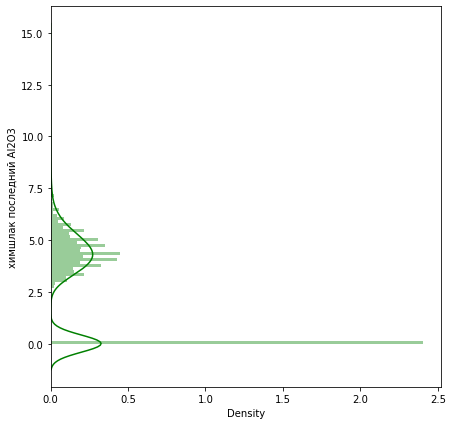

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(7, 7))
sns.distplot(mark_data['химшлак последний Al2O3'], color='g', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
#plt.show()
plt.savefig(f'{SOURCE_DATA}target_range_1.png')

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


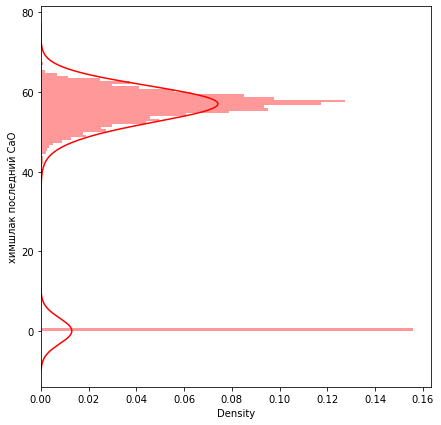

In [27]:
plt.figure(figsize=(7, 7))
sns.distplot(mark_data['химшлак последний CaO'], color='r', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
#plt.show()
plt.savefig(f'{SOURCE_DATA}target_range_2.png')

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


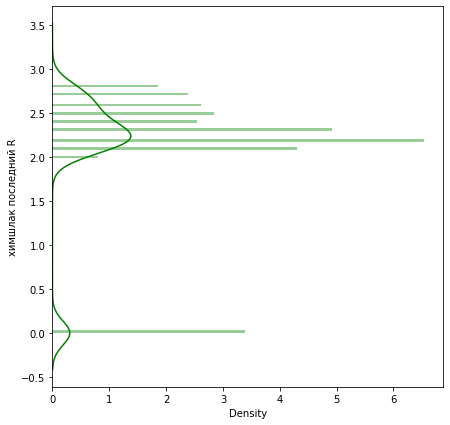

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(7, 7))
sns.distplot(mark_data['химшлак последний R'], color='g', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.show()
plt.savefig(f'{SOURCE_DATA}target_range_3.png')

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


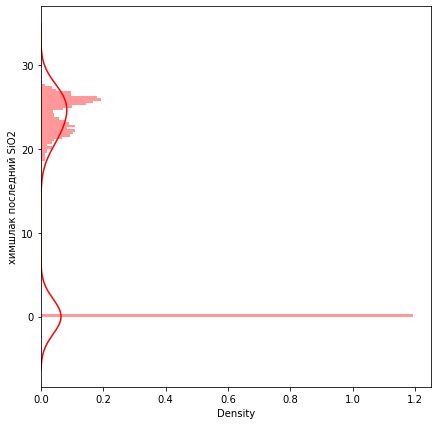

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(7, 7))
sns.distplot(mark_data['химшлак последний SiO2'], color='r', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.show()
plt.savefig(f'{SOURCE_DATA}target_range_4.png')

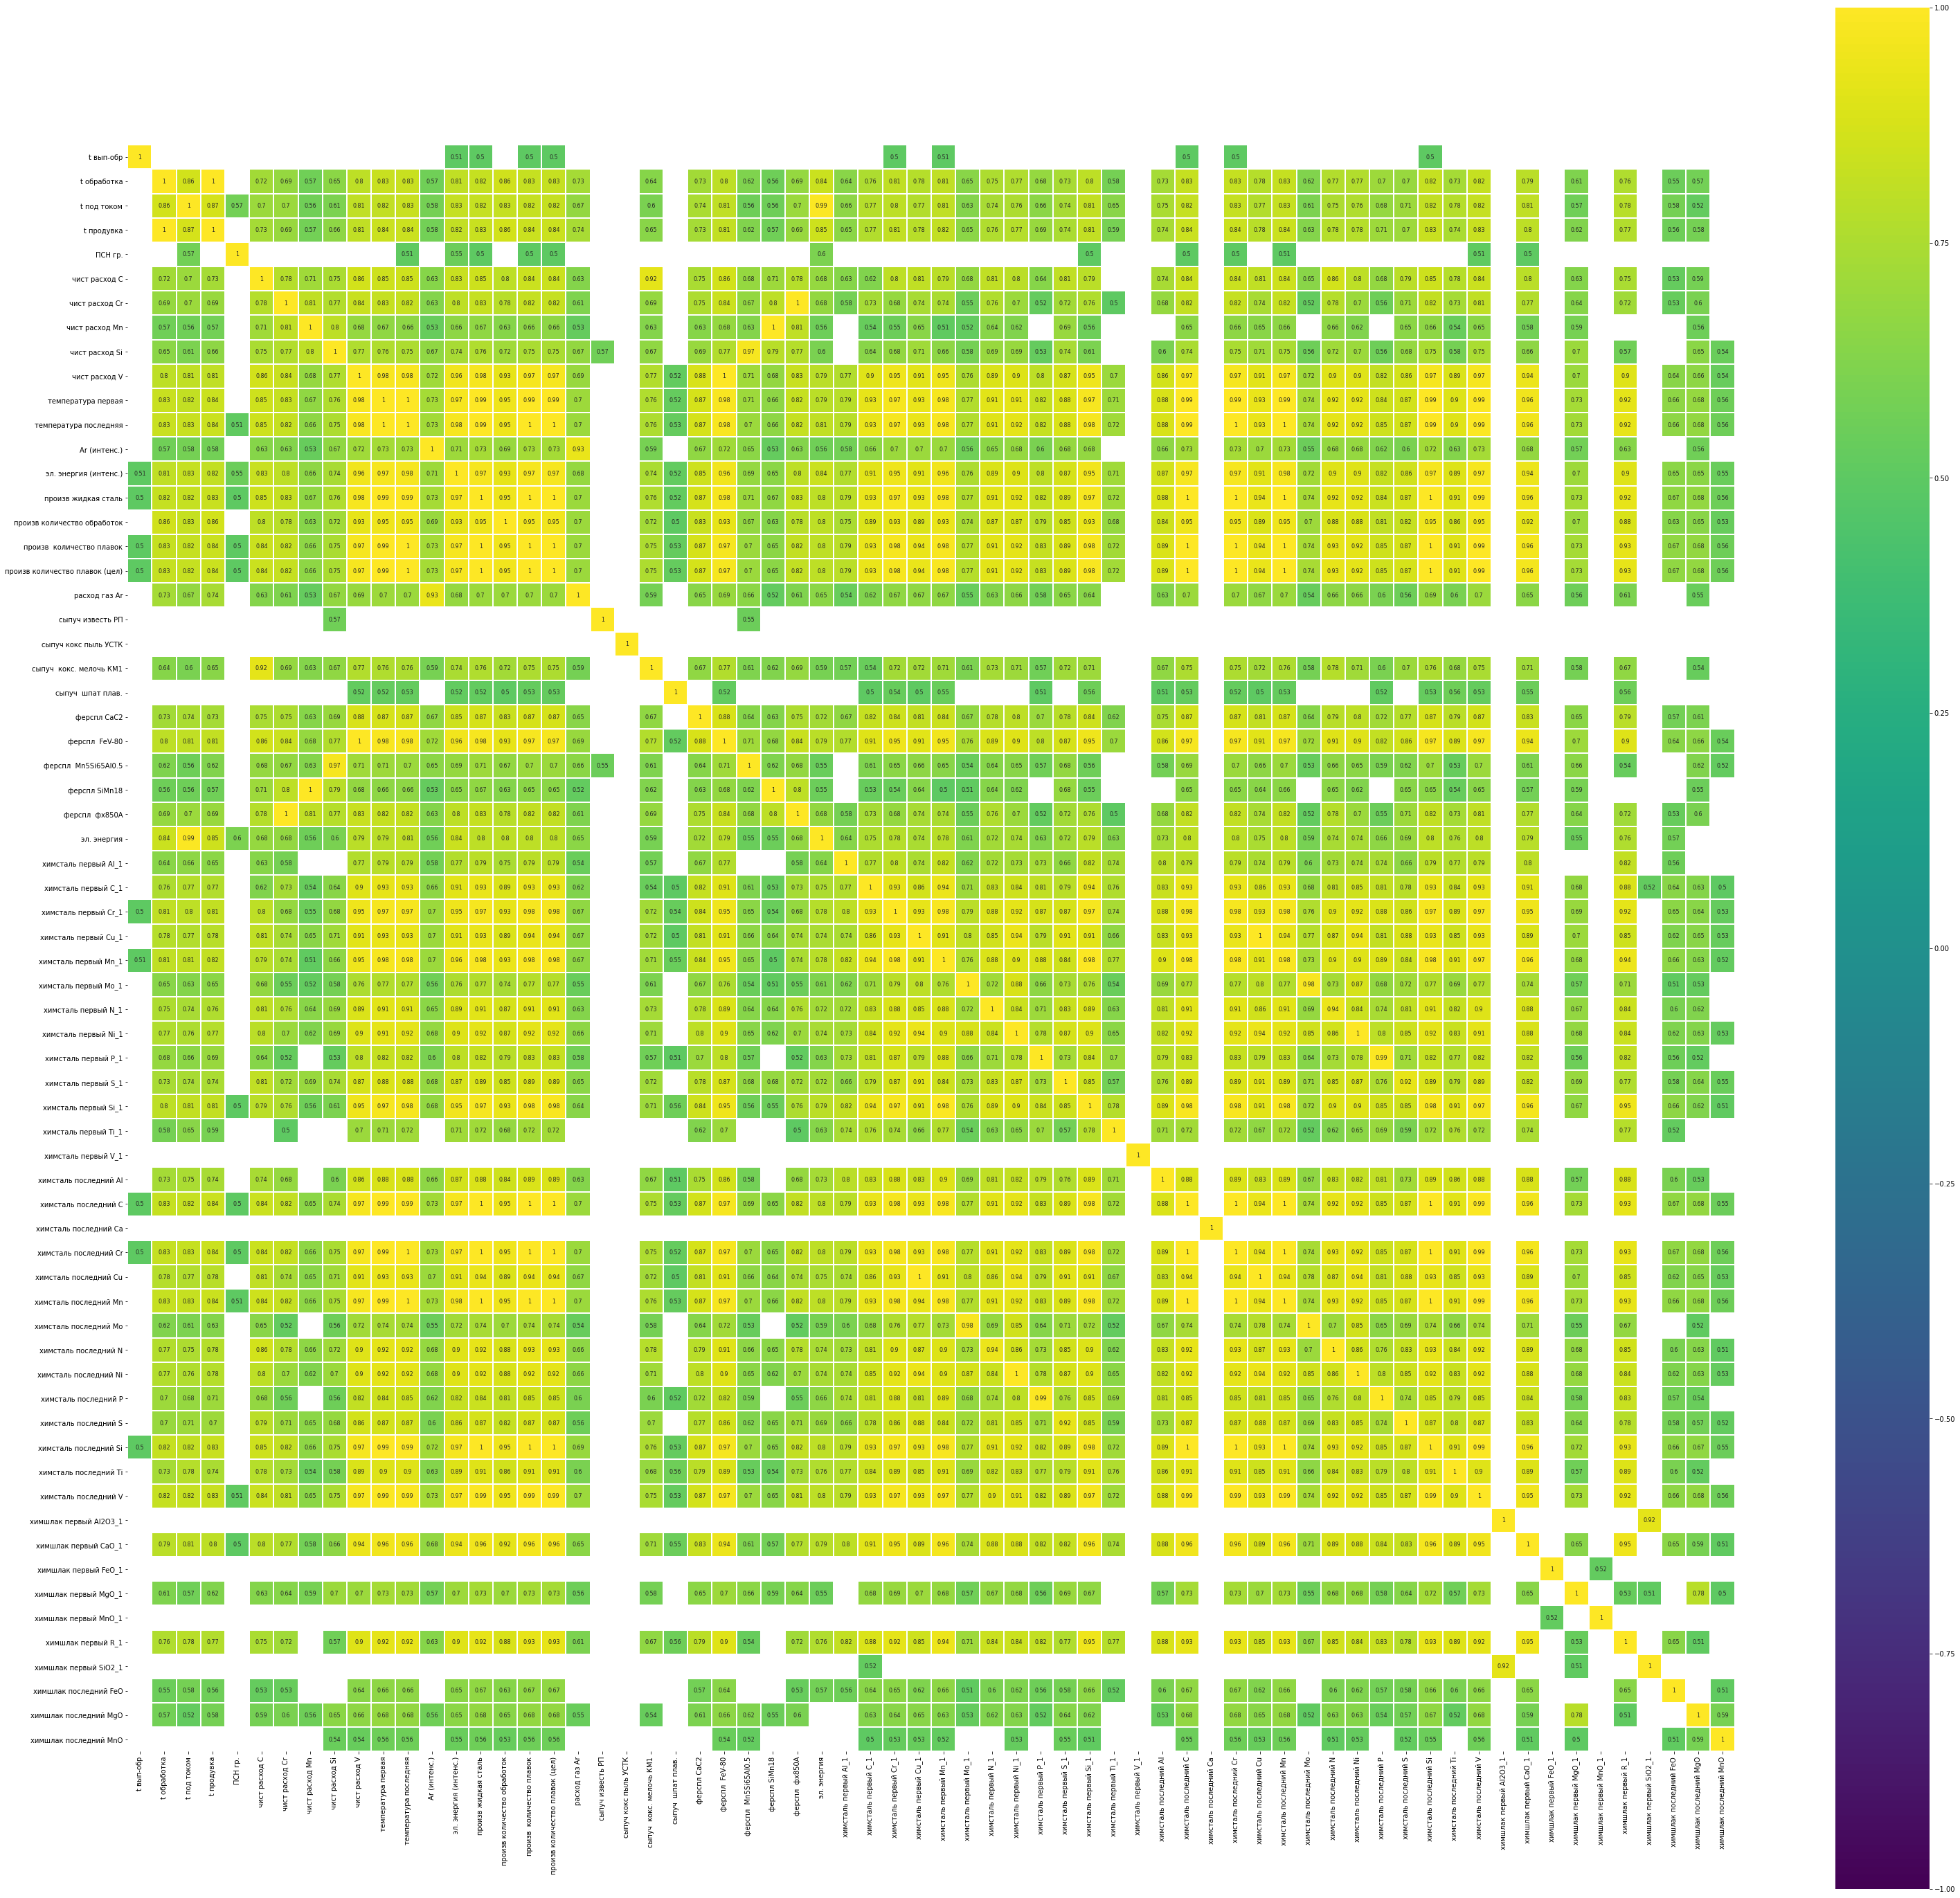

In [30]:
corr_data = mark_data.drop(columns=target_columns).corr()

plt.figure(figsize=(52, 50))

sns.heatmap(corr_data[(corr_data >= 0.5) | (corr_data <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.savefig(f'{SOURCE_DATA}correletion_map.png')

In [ ]:
mark_data.to_csv(POST_PROCESSING_DATA, sep='\t', index=False)

In [ ]:
mark_data.fillna(0, inplace=True)
mark_data.info()

In [ ]:
mark_data = mark_data.apply(lambda x: x.apply(str).str.replace(',', '.') )
mark_data = mark_data.apply(lambda x: pd.to_numeric(x))

In [ ]:
mark_data.head()

In [ ]:
mark_data.to_csv(POST_PROCESSING_DATA, sep='\t', index=False)